In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
R = 40e6  #Ohm
C = 250e-12 #F

V_rep = -0.07 #V
V_L = -0.05   #V
V_redef = -0.08  #V

tau_ref = 2e-3     #s
dt = 0.01e-3   #s
tmax = 1.5    #s
tau_a = 0.2 #s

b = 1e-9    #S

V0 = V_rep  #V
G0 = 0

In [4]:
def corrente(t):
    I = 501e-12 #A
    return I*(t>=0.5)-I*(t>=1)


def solucao(v0, g0, dt, I, t):
    V = np.zeros(np.size(I))
    Ga = np.zeros(np.size(I))

    V[0] = v0
    Ga[0] = g0

    for i in range(np.size(t)-1):
        v = V[i]
        ga = Ga[i]

        if v >= V_L:
            V[i+1] = V_redef
            Ga[i+1] = ga + b
        else:
            V[i+1] = v + dt * ( (1/R * (V_rep - v) + ga * (V_redef - v) + I[i]) / C )
            Ga[i+1] = ga + dt * ( -ga / tau_a)

    return V, Ga

In [5]:
t = np.arange(0, tmax, dt)
I = corrente(t)
V, Ga = solucao(V0, G0, dt, I, t)

limiar = np.full(np.size(I), V_L)

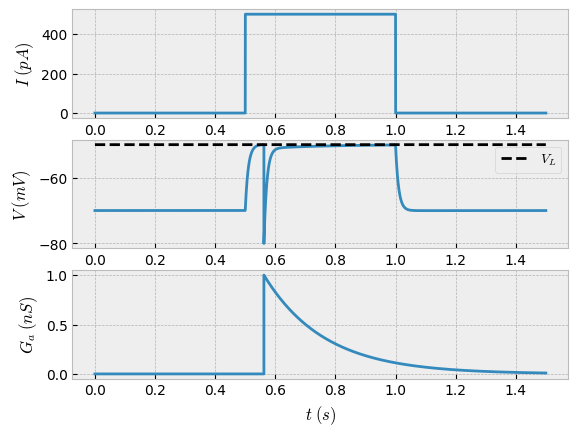

In [16]:
plt.style.use('bmh')

plt.figure()

plt.subplot(3,1,1)
plt.plot(t, I*1e12)
plt.ylabel(r'$I \; (pA)$')

plt.subplot(3,1,2)
plt.plot(t, V*1e3)
plt.plot(t, limiar*1e3, 'k--', label=r'$V_L$')
plt.ylabel(r'$V \;(mV)$')
plt.legend()

plt.subplot(3,1,3)
plt.plot(t, Ga*1e9)
plt.ylabel(r'$G_a \; (nS)$')
plt.xlabel(r'$t \; (s)$')

plt.show()